###### Logistic Regression with a chosen features that can be altered

## Import Libraries

In [1]:
# Importing libraries to work with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get Data

In [2]:
points = pd.read_csv(r"C:\Users\tiger\Downloads\heart_DD.csv")

In [3]:
# Visualize first few rows of dataset
points.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Prepare

In [4]:
# Indepedent matrix of features
X = points.iloc[:, [0,1,2,3,6,7,9,10,11]].values # Can take any number of numerical features 
# Dependent matrix of features
y = points.iloc[:, -1].values

In [5]:
#One value indicator
flag=1 
y= np.reshape(y,(len(y),1))
if sum(X.shape)==len(X):

    flag=0

    X= np.reshape(X,(len(y),1))

    X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)

In [6]:
# Feature scaling
for i in range(0,X.shape[1]):
    X[:,i] = (X[:,i]-np.mean(X[:,i]))/(np.std(X[:,i]))

In [7]:
# Add bias term
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
y_train= np.reshape(y_train,(len(y_train),1))
x_shape = X_train.shape

C:\Users\tiger\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# vector of optimized parameters
theta = np.zeros([1,x_shape[1]])

In [10]:
'''Logistic/Sigmoid function'''
def logistic(z):
    return 1 / (1 + np.exp(-z))

In [11]:
'''Cost Function for logistic regression'''
def fn_cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [12]:
def predictor_f(X, theta):
    return logistic(np.dot(X, theta))

In [13]:
'''Method for making predictions based on given threshold '''
def predict(X, theta, threshold=0.5):
    return predictor_f(X, theta) >= threshold

In [14]:
def gradient_descent(X,y,h,learning_rate,theta):

    cost=[]

    o_error = fn_cost(h,y)

    i=-1

    while True:

        i+=1

        grad = np.dot(X.T, (h - y)) / len(y)

        grad=grad.T

        theta -= learning_rate*grad

        z=np.dot(X, theta.T)

        h = logistic(z)

        error = fn_cost(h,y)

        cost.append(error)

        if abs(error-o_error)<0.000001:

            break

        o_error = error

    return theta,cost,i+1,h

In [15]:
z = np.dot(X_train, theta.T)
h = logistic(z)
learning_rate = 0.01
opt_theta,cost,iters,h = gradient_descent(X_train,y_train,h,learning_rate,theta)
error = fn_cost(h, y_train)
print('Output of cost function for training ->', error)

Output of cost function for training -> 0.3154586026433031


In [16]:
y_train_pred = predict(X_train, opt_theta.T)
y_train_pred = y_train_pred*1
error_train_test = y_train^y_train_pred
error_train_sum = sum(error_train_test)/len(y_train)
print('Classification accuracy error (train)->' , error_train_sum)

Classification accuracy error (train)-> [0.14857143]


In [17]:
zz= np.dot(X_test, opt_theta.T)
hh=logistic(zz)
err = fn_cost(hh,y_test)
print('Output of cost function for test ->', err)

Output of cost function for test -> 0.4135260624841836


In [18]:
y_test_pred = predict(X_test, opt_theta.T)
y_test_pred = y_test_pred*1
error_test = y_test^y_test_pred
error_test_sum = sum(error_test)/len(y_test)
print('Classification accuracy error (test)->',error_test_sum)

Classification accuracy error (test)-> [0.16]


In [19]:
# Print model parameters after training
print('my model parameters(Thetas)->',opt_theta)

my-> [[ 1.23733509  0.21706116 -0.63807317  1.3489293  -0.50513484  0.42953942
   0.38875623 -0.50312639  0.56279352 -0.83303597]]


Text(0.5,1,'Error vs. Number of iterations')

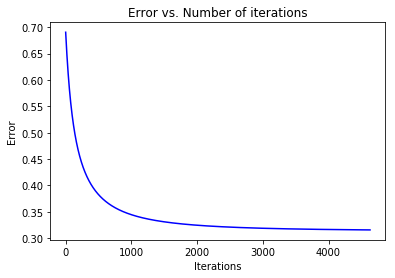

In [20]:
# plot
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'b')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Error')  
ax.set_title('Error vs. Number of iterations') 

In [22]:
# Logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('built-in mse (test set classification error)->',metrics.mean_squared_error(y_test,y_pred))
logreg.fit(X_train, y_train)
print('model parameters for sklearn model->',logreg.coef_)

built-in mse (test set classification error)-> 0.16
model parameters for sklearn model-> [[ 0.62122587  0.21228884 -0.62965602  1.32400273 -0.49661153  0.42528688
   0.3706188  -0.43841173  0.59597578 -0.81610266]]


C:\Users\tiger\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
